In [1]:
#perform lstm on Rainfall_data.csv
import pandas as pd
import numpy as np

df = pd.read_csv('/home/joseph/Desktop/NNDL/Rainfall_data.csv')
df

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14
...,...,...,...,...,...,...,...
247,2020,8,1,20.08,92.31,5.34,1203.09
248,2020,9,1,19.71,90.12,9.22,361.30
249,2020,10,1,18.43,82.69,12.62,180.18
250,2020,11,1,14.83,76.06,16.95,0.49


In [2]:
## setting date as index
df['DATE'] = pd.to_datetime(df[['Year', 'Month','Day']])
df = df.drop(columns=['Year', 'Month','Day'])
df.index = df["DATE"]
df.drop(columns=["DATE"],inplace = True)

In [3]:
# normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df[['Specific Humidity', 'Relative Humidity', 'Temperature','Precipitation']] = scaler.fit_transform(df[['Specific Humidity', 'Relative Humidity', 'Temperature','Precipitation']])
df

,Specific Humidity,Relative Humidity,Temperature,Precipitation
DATE,,,,
2000-01-01,0.156440,0.235335,0.780171,0.000000
2000-02-01,0.201618,0.279764,0.857375,0.000084
2000-03-01,0.184761,0.142138,0.891914,0.000008
2000-04-01,0.542819,0.364457,0.721658,0.000015
2000-05-01,0.786244,0.628081,0.582690,0.207384
...,...,...,...,...
2020-08-01,0.966959,1.000000,0.024787,0.920195
2020-09-01,0.942009,0.961992,0.182446,0.276344
2020-10-01,0.855698,0.833044,0.320601,0.137812


In [4]:
#### training
train_data = df.iloc[:len(df)-12,:]
#### testing
test_data = df.iloc[len(df)-12:,:]

In [5]:
train_data

,Specific Humidity,Relative Humidity,Temperature,Precipitation
DATE,,,,
2000-01-01,0.156440,0.235335,0.780171,0.000000
2000-02-01,0.201618,0.279764,0.857375,0.000084
2000-03-01,0.184761,0.142138,0.891914,0.000008
2000-04-01,0.542819,0.364457,0.721658,0.000015
2000-05-01,0.786244,0.628081,0.582690,0.207384
...,...,...,...,...
2019-08-01,0.933918,0.972926,0.058106,0.510115
2019-09-01,0.946730,0.983860,0.080049,0.710470
2019-10-01,0.835469,0.863415,0.292564,0.147320


In [6]:
# split the data into x_train and y_train
x_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
x_train


,Relative Humidity,Temperature,Precipitation
DATE,,,
2000-01-01,0.235335,0.780171,0.000000
2000-02-01,0.279764,0.857375,0.000084
2000-03-01,0.142138,0.891914,0.000008
2000-04-01,0.364457,0.721658,0.000015
2000-05-01,0.628081,0.582690,0.207384
...,...,...,...
2019-08-01,0.972926,0.058106,0.510115
2019-09-01,0.983860,0.080049,0.710470
2019-10-01,0.863415,0.292564,0.147320


In [7]:
y_train

DATE
2000-01-01    0.156440
2000-02-01    0.201618
2000-03-01    0.184761
2000-04-01    0.542819
2000-05-01    0.786244
                ...   
2019-08-01    0.933918
2019-09-01    0.946730
2019-10-01    0.835469
2019-11-01    0.666217
2019-12-01    0.563722
Name: Specific Humidity, Length: 240, dtype: float64

In [8]:
x_train

,Relative Humidity,Temperature,Precipitation
DATE,,,
2000-01-01,0.235335,0.780171,0.000000
2000-02-01,0.279764,0.857375,0.000084
2000-03-01,0.142138,0.891914,0.000008
2000-04-01,0.364457,0.721658,0.000015
2000-05-01,0.628081,0.582690,0.207384
...,...,...,...
2019-08-01,0.972926,0.058106,0.510115
2019-09-01,0.983860,0.080049,0.710470
2019-10-01,0.863415,0.292564,0.147320


In [9]:
#perform backpropagation on the training data
binary_sigmoid = lambda x: 1/(1+np.exp(-x))

bipolar_sigmoid = lambda x: (1-np.exp(-x))/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

def bipolar_derivative(x):
    return 0.5*(1+x)*(1-x)

#converting the data into numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

#convert x_train to 2d array
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1])
y_train = y_train.reshape(y_train.shape[0],1)

def backpropagation(x_train,y_train,epochs,learning_rate):
    #initializing weights
    w1 = np.random.rand(3,4)
    w2 = np.random.rand(4,1)
    #initializing bias
    b1 = np.random.rand(1,4)
    b2 = np.random.rand(1,1)
    for i in range(epochs):
        #feedforward
        #hidden layer
        z1 = np.dot(x_train,w1) + b1
        a1 = bipolar_sigmoid(z1)
        #output layer
        z2 = np.dot(a1,w2) + b2
        a2 = bipolar_sigmoid(z2)
        #backpropagation
        #output layer
        error = y_train - a2
        delta2 = error * bipolar_derivative(a2)
        #hidden layer
        delta1 = np.dot(delta2,w2.T) * bipolar_derivative(a1)
        #updating weights
        w2 += np.dot(a1.T,delta2) * learning_rate
        w1 += np.dot(x_train.T,delta1) * learning_rate
        #updating bias
        b2 += np.sum(delta2,axis=0,keepdims=True) * learning_rate
        b1 += np.sum(delta1,axis=0,keepdims=True) * learning_rate
    return w1,w2,b1,b2

w1,w2,b1,b2 = backpropagation(x_train,y_train,1000,0.01)

#predicting the values
def predict(x_test,w1,w2,b1,b2):
    #feedforward
    #hidden layer
    z1 = np.dot(x_test,w1) + b1
    a1 = bipolar_sigmoid(z1)
    #output layer
    z2 = np.dot(a1,w2) + b2
    a2 = bipolar_sigmoid(z2)
    return a2

#predicting the values
y_pred = predict(x_train,w1,w2,b1,b2)
y_pred

#converting the predicted values into dataframe
y_pred = pd.DataFrame(y_pred)
y_pred



    


,0
0,0.256570
1,0.245812
2,0.147456
3,0.360972
4,0.710750
...,...
235,0.941110
236,0.957252
237,0.823297
238,0.727354


In [10]:
#show the error rate, learning rate and epochs for the model to converge to the best fit line
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_train, y_pred))
rms

0.10112931397772672

In [ ]:
# show accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)



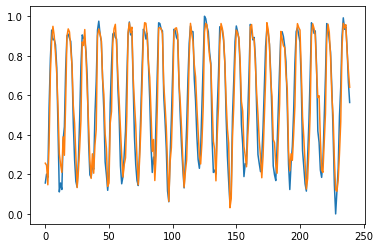

In [11]:
#plot the grah for the predicted values
import matplotlib.pyplot as plt
plt.plot(y_train)
plt.plot(y_pred)
plt.show()


In [12]:
#apply lstm on the x_train and y_train
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import ConvLSTM2D
from keras.layers import ConvLSTM1D
from keras.layers import Conv2D
from collections import Mapping



#reshaping the data into 3d array


#defining the model
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=(3,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

#fit the model
model.fit(x_train,y_train,epochs=100,verbose=1)

#predicting the values
y_pred = model.predict(x_train)
y_pred


2022-12-12 18:26:30.072397: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 18:26:30.354392: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 18:26:30.354416: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 18:26:31.447958: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

ImportError: cannot import name 'Mapping' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [ ]:
# write the inference code here
#converting the predicted values into dataframe
y_pred = pd.DataFrame(y_pred)
y_pred

#show the error rate, learning rate and epochs for the model to converge to the best fit line
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_train, y_pred))
rms

#plot the grah for the predicted values
import matplotlib.pyplot as plt
plt.plot(y_train)
plt.plot(y_pred)
plt.show()

# 

In [13]:
# use autoencoder to predict the values
def autoencoder(x_train,y_train,epochs,learning_rate):
    #initializing weights
    w1 = np.random.rand(3,4)
    w2 = np.random.rand(4,1)
    #initializing bias
    b1 = np.random.rand(1,4)
    b2 = np.random.rand(1,1)
    for i in range(epochs):
        #feedforward
        #hidden layer
        z1 = np.dot(x_train,w1) + b1
        a1 = bipolar_sigmoid(z1)
        #output layer
        z2 = np.dot(a1,w2) + b2
        a2 = bipolar_sigmoid(z2)
        #backpropagation
        #output layer
        error = y_train - a2
        delta2 = error * bipolar_derivative(a2)
        #hidden layer
        delta1 = np.dot(delta2,w2.T) * bipolar_derivative(a1)
        #updating weights
        w2 += np.dot(a1.T,delta2) * learning_rate
        w1 += np.dot(x_train.T,delta1) * learning_rate
        #updating bias
        b2 += np.sum(delta2,axis=0,keepdims=True) * learning_rate
        b1 += np.sum(delta1,axis=0,keepdims=True) * learning_rate
    return w1,w2,b1,b2

w1,w2,b1,b2 = autoencoder(x_train,y_train,1000,0.01)

#predicting the values
def predict(x_test,w1,w2,b1,b2):
    #feedforward
    #hidden layer
    z1 = np.dot(x_test,w1) + b1
    a1 = bipolar_sigmoid(z1)
    #output layer
    z2 = np.dot(a1,w2) + b2
    a2 = bipolar_sigmoid(z2)
    return a2

#predicting the values
y_pred = predict(x_train,w1,w2,b1,b2)
y_pred

array([[0.25704659],
       [0.24392541],
       [0.13830359],
       [0.36505453],
       [0.72017964],
       [0.87301072],
       [0.94707398],
       [0.89485455],
       [0.80342242],
       [0.70537986],
       [0.53746851],
       [0.31020414],
       [0.25196896],
       [0.21045406],
       [0.39465182],
       [0.29954567],
       [0.56926743],
       [0.89593373],
       [0.93255516],
       [0.91471547],
       [0.82495278],
       [0.74785762],
       [0.5489236 ],
       [0.46185338],
       [0.2945635 ],
       [0.1253272 ],
       [0.21818195],
       [0.34011072],
       [0.47845837],
       [0.87014178],
       [0.84088244],
       [0.92883739],
       [0.78631599],
       [0.61329322],
       [0.45765302],
       [0.27292558],
       [0.17486664],
       [0.30830846],
       [0.20508626],
       [0.35341173],
       [0.43155008],
       [0.90325229],
       [0.93160011],
       [0.90539607],
       [0.86856981],
       [0.68079871],
       [0.60340854],
       [0.408

In [ ]:
#autoencoder using tensorflow and use the same dataset to predict the values using autoencoder and compare the results with the above results and write the inference code here and show the accuracy of the model and use relu activation function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#normalizing the data
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(x_train))

#defining the model
model = keras.Sequential([
    normalizer,
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='relu')
])

#compile the model
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

#fit the model
model.fit(x_train,y_train,epochs=100,verbose=1)

#predicting the values
y_pred = model.predict(x_train)
y_pred

#converting the predicted values into dataframe
y_pred = pd.DataFrame(y_pred)
y_pred

#show the error rate, learning rate and epochs for the model to converge to the best fit line
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_train, y_pred))
rms

#compare the results with the above results
